In [ ]:
# 1] Import Libraries & Load Data :-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Chocolate Sales (2).csv")

In [ ]:
print(df.head(10))

      Sales Person      Country              Product        Date      Amount  \
0   Jehu Rudeforth           UK      Mint Chip Choco  04/01/2022   $5,320.00   
1      Van Tuxwell        India        85% Dark Bars  01/08/2022   $7,896.00   
2     Gigi Bohling        India  Peanut Butter Cubes  07/07/2022   $4,501.00   
3     Jan Morforth    Australia  Peanut Butter Cubes  27/04/2022  $12,726.00   
4   Jehu Rudeforth           UK  Peanut Butter Cubes  24/02/2022  $13,685.00   
5      Van Tuxwell        India   Smooth Sliky Salty  06/06/2022   $5,376.00   
6       Oby Sorrel           UK      99% Dark & Pure  25/01/2022  $13,685.00   
7  Gunar Cockshoot    Australia          After Nines  24/03/2022   $3,080.00   
8   Jehu Rudeforth  New Zealand       50% Dark Bites  20/04/2022   $3,990.00   
9      Brien Boise    Australia      99% Dark & Pure  04/07/2022   $2,835.00   

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
5    

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB
None


In [ ]:
print(df.describe(include='all'))

         Sales Person    Country  Product        Date     Amount  \
count            3282       3282     3282        3282       3282   
unique             25          6       22         504       3013   
top     Kelci Walkden  Australia  Eclairs  13/01/2024  $2,317.00   
freq              162        615      180          16          5   
mean              NaN        NaN      NaN         NaN        NaN   
std               NaN        NaN      NaN         NaN        NaN   
min               NaN        NaN      NaN         NaN        NaN   
25%               NaN        NaN      NaN         NaN        NaN   
50%               NaN        NaN      NaN         NaN        NaN   
75%               NaN        NaN      NaN         NaN        NaN   
max               NaN        NaN      NaN         NaN        NaN   

        Boxes Shipped  
count     3282.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean       164.666971  
std        124.024736  
min          1.

In [ ]:
# Conclusion :-
# Dataset contains 3282 rows and 6 columns.
# "Amount" is stored as text (currency format) → needs cleaning.
# "Date" column must be converted to datetime.

In [ ]:
# 2] Data Cleaning & Preprocessing :-
# Remove $ and commas from Amount and convert to numeric
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3327527020.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# Create Year and Month columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
# Check for missing values
print(df.isnull().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
Year             0
Month            0
dtype: int64


In [ ]:
# Conclusion :-
# Amount successfully converted to numeric.
# Date transformed into datetime format.
# No significant missing values.

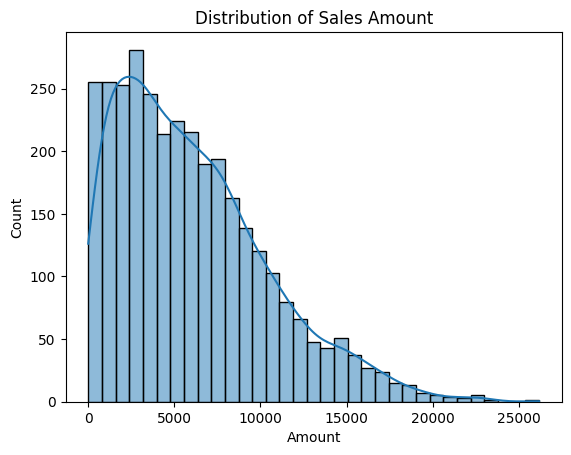

In [ ]:
# 3] Univariate Analysis :-
# 3.1) Sales Distribution :-
plt.figure()
sns.histplot(df['Amount'], kde=True)
plt.title("Distribution of Sales Amount")
plt.show()

In [ ]:
# Conclusion:-
# Sales are likely right-skewed.
# Majority of sales fall in mid-range.

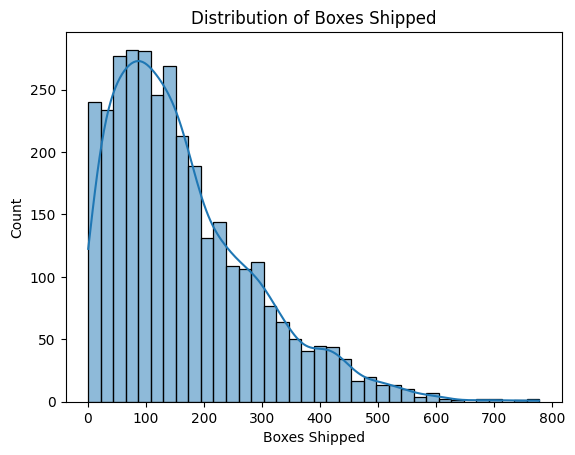

In [ ]:
# 3.2) Boxes Shipped Distribution :-
plt.figure()
sns.histplot(df['Boxes Shipped'], kde=True)
plt.title("Distribution of Boxes Shipped")
plt.show()

In [ ]:
# Conclusion:-
# Most shipments are moderate in size.
# Some large bulk shipments exist.

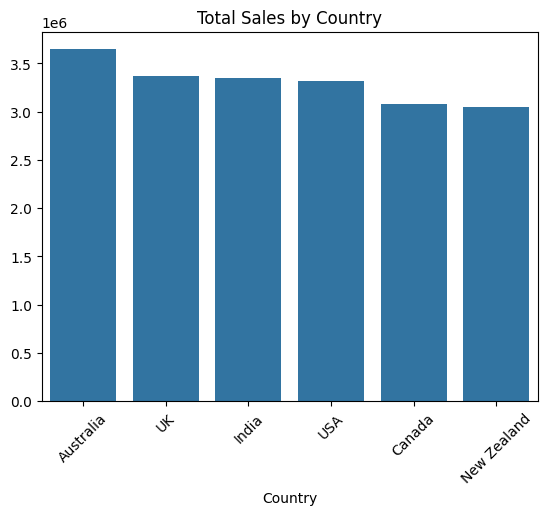

Country
Australia      3646444.35
UK             3365388.90
India          3343730.83
USA            3313858.09
Canada         3078495.65
New Zealand    3043654.04
Name: Amount, dtype: float64


In [ ]:
# 4] Categorical Analysis :-
# 4.1) Sales by Country :-
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure()
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.xticks(rotation=45)
plt.title("Total Sales by Country")
plt.show()

print(country_sales)

In [ ]:
# Conclusion:-
# Identify highest revenue generating country.
# Helps in deciding regional marketing focus.

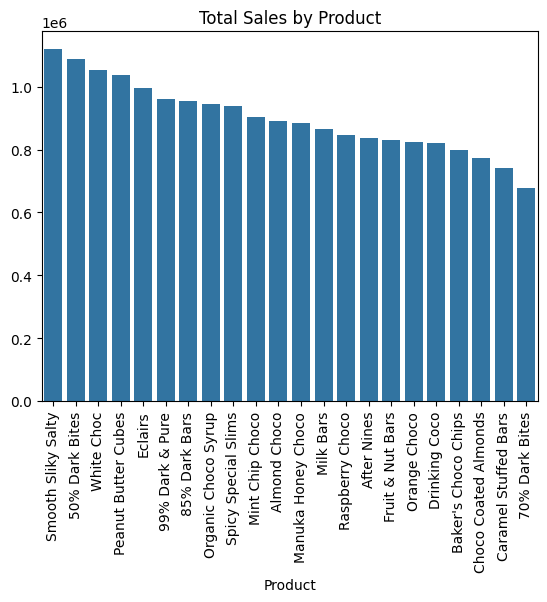

Product
Smooth Sliky Salty      1120201.09
50% Dark Bites          1087659.35
White Choc              1054257.00
Peanut Butter Cubes     1036591.09
Eclairs                  996947.96
99% Dark & Pure          960033.45
85% Dark Bars            955268.24
Organic Choco Syrup      945345.73
Spicy Special Slims      938131.69
Mint Chip Choco          904989.55
Almond Choco             890454.65
Manuka Honey Choco       885208.03
Milk Bars                866273.62
Raspberry Choco          845388.41
After Nines              837215.67
Fruit & Nut Bars         829278.96
Orange Choco             824070.85
Drinking Coco            822245.57
Baker's Choco Chips      799085.67
Choco Coated Almonds     773062.91
Caramel Stuffed Bars     742516.15
70% Dark Bites           677346.22
Name: Amount, dtype: float64


In [ ]:
# 4.2) Sales by Product :-
product_sales = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

plt.figure()
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.xticks(rotation=90)
plt.title("Total Sales by Product")
plt.show()

print(product_sales)

In [ ]:
# Conclusion:-
# Top-performing chocolate products identified.
# Low-performing products may need promotion.

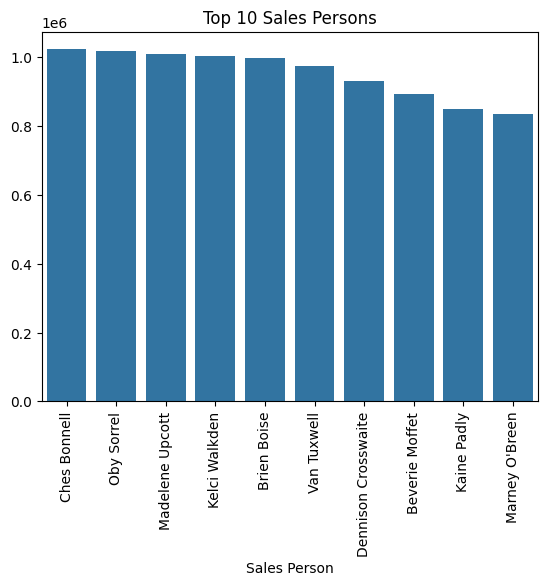

Sales Person
Ches Bonnell           1022599.96
Oby Sorrel             1017204.12
Madelene Upcott        1010028.72
Kelci Walkden          1002929.10
Brien Boise             997326.48
Van Tuxwell             974425.09
Dennison Crosswaite     931849.57
Beverie Moffet          892421.37
Kaine Padly             849062.76
Marney O'Breen          836427.63
Name: Amount, dtype: float64


In [ ]:
# 4.3) Sales by Sales Person :-
sales_person = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

plt.figure()
sns.barplot(x=sales_person.index[:10], y=sales_person.values[:10])
plt.xticks(rotation=90)
plt.title("Top 10 Sales Persons")
plt.show()

print(sales_person.head(10))

In [ ]:
# Conclusion:-
# Top 10 sales performers identified.
# Useful for performance evaluation & incentives.

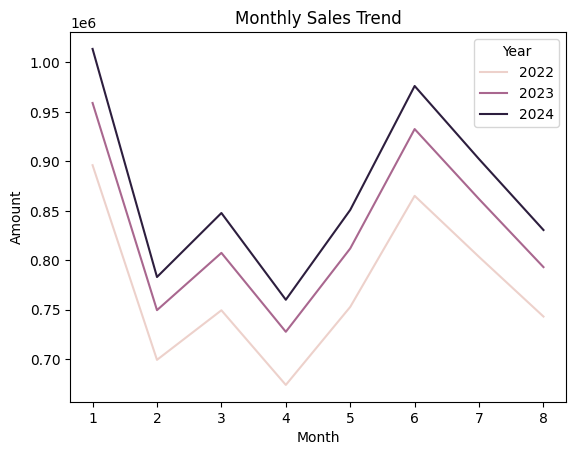

In [ ]:
# 5] Time Series Analysis :-
# 5.1) Monthly Sales Trend :-
monthly_sales = df.groupby(['Year','Month'])['Amount'].sum().reset_index()

plt.figure()
sns.lineplot(data=monthly_sales, x='Month', y='Amount', hue='Year')
plt.title("Monthly Sales Trend")
plt.show()

In [ ]:
# Conclusion:-
# Seasonal patterns can be identified.
# Peak sales months indicate festive or high-demand periods.

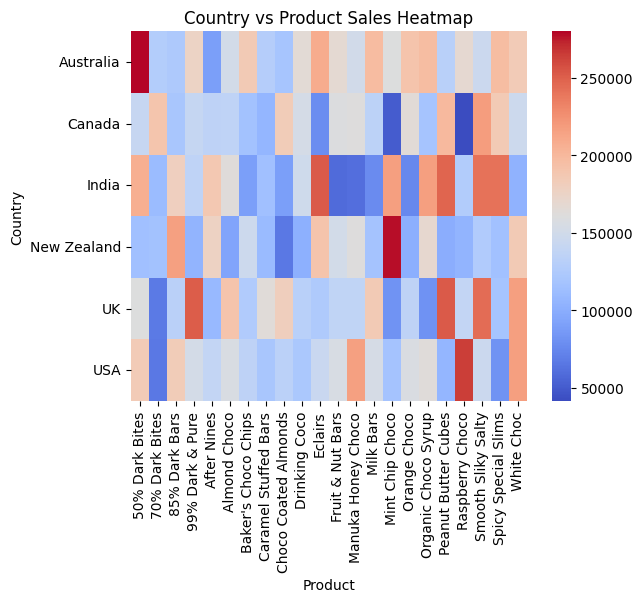

In [ ]:
# 6] Country-wise Product Performance :-
pivot_table = pd.pivot_table(df, values='Amount',
                             index='Country',
                             columns='Product',
                             aggfunc='sum')

plt.figure()
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title("Country vs Product Sales Heatmap")
plt.show()

In [ ]:
# Conclusion:-
# Shows which product performs best in which country.
# Helps in region-specific product strategy.

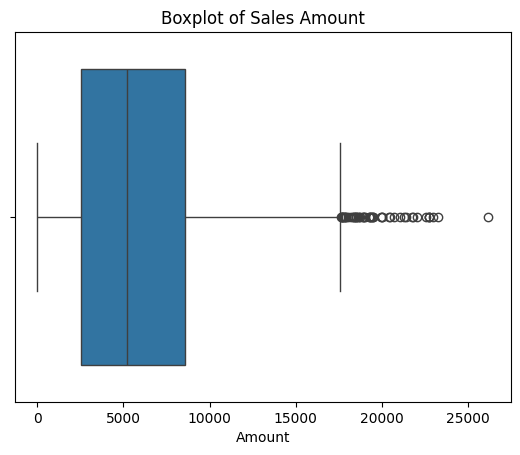

In [ ]:
# 7] Outlier Detection :-
plt.figure()
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Sales Amount")
plt.show()

In [ ]:
# Conclusion:-
# High-value transactions appear as outliers.
# These could represent bulk or corporate orders.